In [52]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

pose  
0 - no arm raise  
1 - left arm raise  
2 - right arm raise  
3 - both arm raise

In [53]:
file_path = os.path.dirname(os.path.abspath("__file__"))
file_path

'/home/cho/dev_ws/DL/src'

In [54]:
both_arm_df = pd.read_csv(file_path + "/both_arm_raise.csv", sep=",", dtype=np.float32)
both_arm_df.head()

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y
0,0.683398,0.747708,0.408966,0.716902,0.827374,0.555535,0.303732,0.519711,0.794245,0.208751,0.339129,0.221152
1,0.683088,0.748783,0.406802,0.720690,0.827528,0.555084,0.297981,0.515725,0.788756,0.207973,0.339467,0.219338
2,0.683238,0.748576,0.406419,0.722726,0.828817,0.548951,0.293369,0.510980,0.785055,0.203060,0.339565,0.214264
3,0.683462,0.748734,0.406396,0.725758,0.827321,0.547796,0.291677,0.506617,0.785268,0.202955,0.339876,0.203043
4,0.682330,0.749346,0.404211,0.726260,0.826048,0.547732,0.288047,0.504067,0.785443,0.201180,0.340386,0.200173


In [55]:
both_arm_df['pose'] = [3] * len(both_arm_df.index)

In [56]:
right_arm_df = pd.read_csv(file_path + "/right_arm_raise.csv", sep=",", dtype=np.float32)
right_arm_df.head()

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y
0,0.734924,0.700707,0.475147,0.652460,0.813908,0.965826,0.314627,0.530433,0.713771,1.079682,0.322866,0.245682
1,0.735223,0.700528,0.475020,0.654913,0.810679,0.967127,0.318697,0.529731,0.696921,1.106683,0.322451,0.240319
2,0.736063,0.700277,0.475373,0.656894,0.807613,0.968098,0.324039,0.526738,0.683332,1.112513,0.321774,0.236862
3,0.736192,0.700236,0.474995,0.657405,0.805549,0.968765,0.327413,0.514340,0.687464,1.138494,0.321573,0.227668
4,0.735995,0.699919,0.474736,0.655993,0.805081,0.968138,0.328899,0.507623,0.733760,1.164838,0.320943,0.221624


In [57]:
right_arm_df['pose'] = [2] * len(right_arm_df.index)

In [58]:
left_arm_df = pd.read_csv(file_path + "/left_arm_raise.csv", sep=",", dtype=np.float32)
left_arm_df.head()

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y
0,0.581190,0.651169,0.329285,0.678639,0.727433,0.506192,0.252301,0.934835,0.785936,0.194550,0.277240,1.140141
1,0.581889,0.647356,0.328911,0.679858,0.730231,0.504228,0.252301,0.937551,0.788325,0.194322,0.271427,1.140018
2,0.581889,0.647279,0.327732,0.681904,0.730640,0.502220,0.252213,0.944286,0.793941,0.193598,0.277567,1.158449
3,0.581945,0.647205,0.327720,0.682838,0.730307,0.499979,0.252572,0.950621,0.796036,0.193443,0.357322,1.080279
4,0.582796,0.646530,0.325927,0.686652,0.730224,0.500015,0.252803,0.960239,0.796923,0.193070,0.377159,1.074092


In [59]:
left_arm_df['pose'] = [1] * len(left_arm_df.index)

In [60]:
no_arm_df = pd.read_csv(file_path + "/no_arm_raise.csv", sep=",", dtype=np.float32)
no_arm_df.head()

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y
0,0.617873,0.624977,0.341562,0.626331,0.666373,0.878865,0.281522,0.886307,0.650729,1.092237,0.252426,1.078605
1,0.620195,0.629946,0.341123,0.630602,0.666217,0.902928,0.280570,0.902571,0.651482,1.124159,0.248442,1.128411
2,0.620667,0.630795,0.340460,0.634483,0.664888,0.902389,0.280506,0.906721,0.653561,1.132537,0.246329,1.139112
3,0.620871,0.630874,0.340300,0.634613,0.663306,0.901437,0.280964,0.905402,0.651237,1.127524,0.246324,1.134200
4,0.620968,0.631693,0.340222,0.635353,0.662940,0.904533,0.281172,0.906421,0.648121,1.126874,0.246415,1.138264


In [61]:
no_arm_df['pose'] = [0] * len(no_arm_df.index)

In [62]:
pose_df = pd.concat((no_arm_df, left_arm_df, right_arm_df, both_arm_df))

In [63]:
pose_df.head()

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,pose
0,0.617873,0.624977,0.341562,0.626331,0.666373,0.878865,0.281522,0.886307,0.650729,1.092237,0.252426,1.078605,0
1,0.620195,0.629946,0.341123,0.630602,0.666217,0.902928,0.280570,0.902571,0.651482,1.124159,0.248442,1.128411,0
2,0.620667,0.630795,0.340460,0.634483,0.664888,0.902389,0.280506,0.906721,0.653561,1.132537,0.246329,1.139112,0
3,0.620871,0.630874,0.340300,0.634613,0.663306,0.901437,0.280964,0.905402,0.651237,1.127524,0.246324,1.134200,0
4,0.620968,0.631693,0.340222,0.635353,0.662940,0.904533,0.281172,0.906421,0.648121,1.126874,0.246415,1.138264,0


In [64]:
pose_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 80
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   left_shoulder_x   334 non-null    float32
 1   left_shoulder_y   334 non-null    float32
 2   right_shoulder_x  334 non-null    float32
 3   right_shoulder_y  334 non-null    float32
 4   left_elbow_x      334 non-null    float32
 5   left_elbow_y      334 non-null    float32
 6   right_elbow_x     334 non-null    float32
 7   right_elbow_y     334 non-null    float32
 8   left_wrist_x      334 non-null    float32
 9   left_wrist_y      334 non-null    float32
 10  right_wrist_x     334 non-null    float32
 11  right_wrist_y     334 non-null    float32
 12  pose              334 non-null    int64  
dtypes: float32(12), int64(1)
memory usage: 20.9 KB


In [65]:
pose_df['pose'].unique()

array([0, 1, 2, 3])

/tmp/ipykernel_40864/2115427911.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


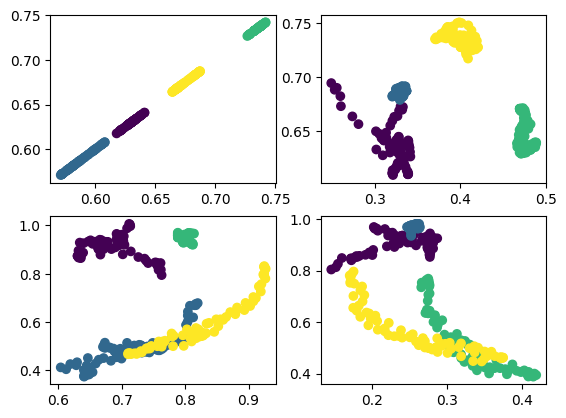

In [66]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.scatter(pose_df['left_shoulder_x'], pose_df['left_shoulder_x'],
               c = pose_df['pose'])
ax2 = fig.add_subplot(222)
ax2.scatter(pose_df['right_shoulder_x'], pose_df['right_shoulder_y'],
               c = pose_df['pose'])
ax3 = fig.add_subplot(223)
ax3.scatter(pose_df['left_elbow_x'], pose_df['left_elbow_y'],
               c = pose_df['pose'])
ax4 = fig.add_subplot(224)
ax4.scatter(pose_df['right_elbow_x'], pose_df['right_elbow_y'],
               c = pose_df['pose'])
fig.show()


In [67]:
X = pose_df.drop(['pose'], axis=1).values
y = pose_df['pose'].values

In [68]:
X.shape, y.shape

((334, 12), (334,))

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    shuffle=True,
                                                    stratify=y)

In [70]:
len(X_train), len(X_test), len(y_train), len(y_test)

(267, 67, 267, 67)

In [71]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1300      
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 4)                 204       
                                                                 
Total params: 6554 (25.60 KB)
Trainable params: 6554 (25.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.fit(X_train, y_train, batch_size = 50, epochs = 50, verbose = 1)

Epoch 1/50


6/6 [==============================] - 1s 3ms/step - loss: 1.3311 - accuracy: 0.4382
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.2264 - accuracy: 0.7828
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1362 - accuracy: 0.9139
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0511 - accuracy: 0.9476
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.9670 - accuracy: 0.9700
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.8780 - accuracy: 0.9888
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.7926 - accuracy: 1.0000
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 1.0000
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6122 - accuracy: 1.0000
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 1.0000
Epoch 11/50
6/6 [==============================] -

In [78]:
results = model.evaluate(X_test, y_test)
results[1]

3/3 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 1.0000


1.0

In [81]:
X_test[0], y_test[0]

(array([0.6376817 , 0.63746476, 0.32669815, 0.63667196, 0.66532016,
        0.9405124 , 0.27135187, 0.9217041 , 0.44107547, 1.0076445 ,
        0.4008689 , 1.0505649 ], dtype=float32),
 0)

In [87]:
model.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 15ms/step


array([[9.9129617e-01, 3.8831322e-03, 4.7869249e-03, 3.3804499e-05]],
      dtype=float32)

In [50]:
model.save("arm_pose_model")

INFO:tensorflow:Assets written to: arm_pose_model/assets


INFO:tensorflow:Assets written to: arm_pose_model/assets
